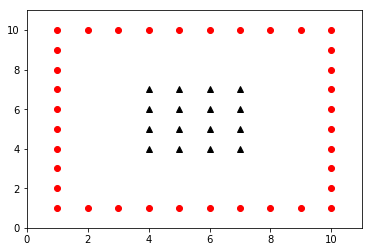

In [4]:
# Runs kernel SVM on a 2-d data set and displays the results
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Load in a 2-d data set. Labels are +1/-1 and each line is a single
# data point, of the form: x1 x2 y
datafile = 'data1.txt'
data = np.loadtxt(datafile)
n,p = data.shape
x = data[:,0:2]
y = data[:,2]
# Now display the data for good measure
xmin = min(x[:,0]) - 1
xmax = max(x[:,0]) + 1
ymin = min(x[:,1]) - 1
ymax = max(x[:,1]) + 1
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [5]:
# Now train SVM
clf = SVC(kernel='rbf', C=1.0, gamma=0.25)
clf.fit(x,y)
sv = np.zeros(n,dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

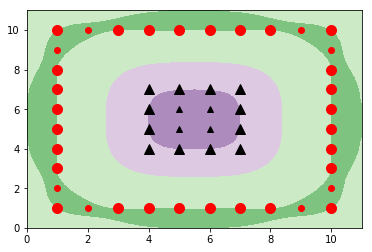

In [6]:
delta = 0.01
xx, yy = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()